In [0]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/drive/My Drive/all_data.csv',encoding='latin-1',names=['sentiments','description'])
df

,sentiments,description
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentiments   4846 non-null   object
 1   description  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [4]:
df['sentiments'].value_counts()

neutral     2879
positive    1363
negative     604
Name: sentiments, dtype: int64

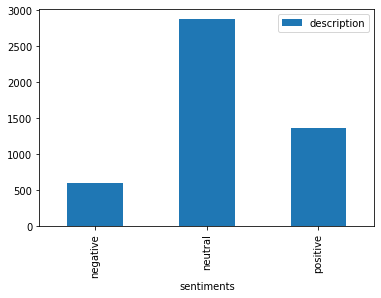

In [5]:
df.groupby('sentiments').count().plot.bar()

In [0]:
#print(len(df['description'][0].split(" ")))
#print(len(set(df['description'][0].split(" "))))

In [0]:
df['des_length'] = df['description'].str.len()

In [0]:
df['word_count'] = df['description'].apply(lambda row: len(row.split(" ")))

In [0]:
df['unique_words'] = df['description'].apply(lambda row: len(set(row.split(" "))))

In [0]:
#s=set(map(lambda word: word.lower().strip(), df['description'][0].split(" ")))
#s11=list(map(lambda word: word.lower().strip(), df['description'][0].split(" ")))

#print(len(s)/len(s11))
#print(len(set(s)

In [0]:
def uniqueness_ratio(row):
        w1 = set(map(lambda word: word.lower().strip(), row['description'].split(" ")))
        w2 = list(map(lambda word: word.lower().strip(), row['description'].split(" ")))    
        return 1.0 * (len(w1) / len(w2))

In [0]:
df['Unique_word_ratio'] = df.apply(uniqueness_ratio,axis=1)

In [13]:
df

,sentiments,description,des_length,word_count,unique_words,Unique_word_ratio
0,neutral,"According to Gran , the company has no plans t...",127,25,19,0.760000
1,neutral,Technopolis plans to develop in stages an area...,190,31,28,0.903226
2,negative,The international electronic industry company ...,228,36,31,0.833333
3,positive,With the new production plant the company woul...,206,33,24,0.727273
4,positive,According to the company 's updated strategy f...,203,41,32,0.780488
...,...,...,...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,144,26,25,0.923077
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,148,30,22,0.733333
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,108,23,19,0.826087
4844,negative,Net sales of the Paper segment decreased to EU...,226,44,29,0.659091


In [0]:
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
import re

In [17]:
print((STOPWORDS))

{'about', 'no', 'off', 'doing', 'an', 'myself', "i'd", 'on', "weren't", "shan't", 'that', "hadn't", 'get', 'our', 'very', 'more', "don't", 'i', "he'd", 'when', 'through', 'than', 'there', 'www', 'yourself', 'the', 'so', 'by', 'were', "aren't", 'not', "he'll", 'they', 'which', 'who', 'and', "why's", 'ours', 'after', 'under', 'itself', 'only', 'some', 'these', 'can', 'further', 'below', 'how', 'it', "what's", 'been', 'at', 'we', 'any', 'like', 'themselves', "where's", 'cannot', 'am', 'could', "he's", 'theirs', 'having', 'did', 'before', "we've", "i've", 'k', 'would', 'if', 'with', "you're", 'has', 'also', 'com', 'had', 'same', 'once', 'shall', 'ever', "it's", 'such', "mustn't", "doesn't", 'above', 'since', "i'm", 'this', 'nor', 'or', 'while', "haven't", 'again', 'in', 'just', "when's", 'yours', 'against', 'up', 'do', 'other', "how's", 'http', "isn't", "wasn't", 'however', 'ought', 'being', 'each', 'are', 'into', "i'll", "we'll", 'between', "couldn't", 'over', "let's", 'of', 'else', "we'r

In [0]:
def preprocess_text(sentance):
  sentance=str(sentance).lower()
  sentance=re.sub('[^A-Za-z0-9]+', ' ', sentance)
  porter = PorterStemmer()
  sentance=porter.stem(sentance)
  sent = ' '.join(e for e in sentance.split() if e.lower() not in STOPWORDS)
  return sent.strip()

In [0]:
df['description']=df['description'].apply(preprocess_text)

In [20]:
df

,sentiments,description,des_length,word_count,unique_words,Unique_word_ratio
0,neutral,according gran company plans move production r...,127,25,19,0.760000
1,neutral,technopolis plans develop stages area less 100...,190,31,28,0.903226
2,negative,international electronic industry company elco...,228,36,31,0.833333
3,positive,new production plant company increase capacity...,206,33,24,0.727273
4,positive,according company s updated strategy years 200...,203,41,32,0.780488
...,...,...,...,...,...,...
4841,negative,london marketwatch share prices ended lower lo...,144,26,25,0.923077
4842,neutral,rinkuskiai s beer sales fell 6 5 per cent 4 16...,148,30,22,0.733333
4843,negative,operating profit fell eur 35 4 mn eur 68 8 mn ...,108,23,19,0.826087
4844,negative,net sales paper segment decreased eur 221 6 mn...,226,44,29,0.659091


In [21]:
df.dtypes

sentiments            object
description           object
des_length             int64
word_count             int64
unique_words           int64
Unique_word_ratio    float64
dtype: object

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


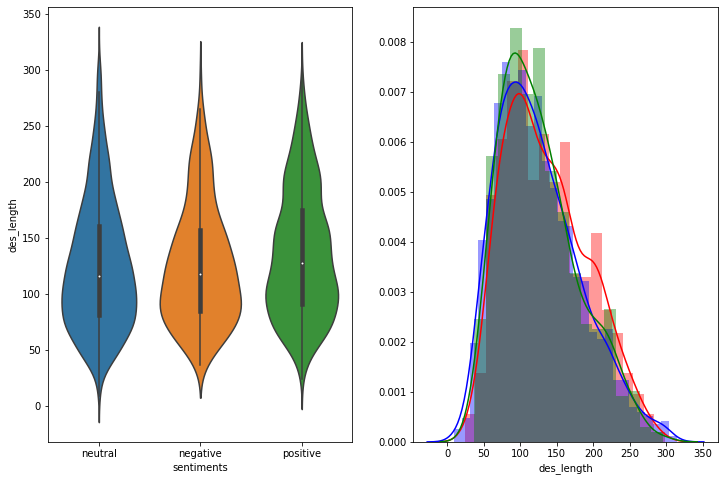

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'sentiments', y = 'des_length', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiments'] == 'positive']['des_length'][0:] , label = "positive", color = 'red')
sns.distplot(df[df['sentiments'] == 'neutral']['des_length'][0:] , label = "neutral" , color = 'blue' )
sns.distplot(df[df['sentiments'] == 'negative']['des_length'][0:] , label = "negative" , color = 'green' )

plt.show()

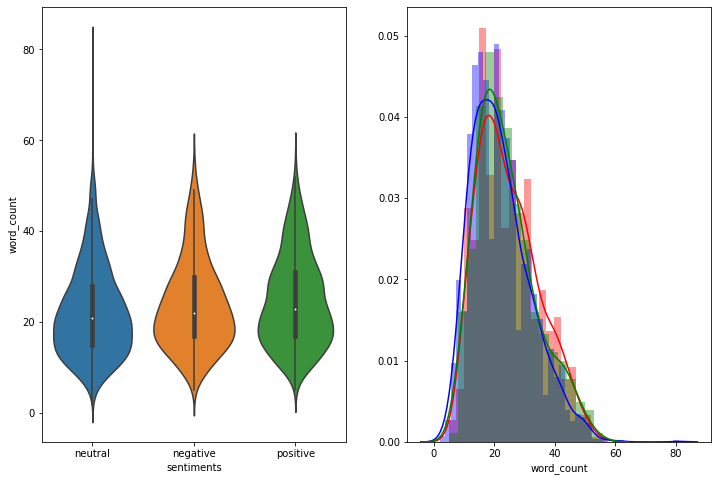

In [23]:
#import matplotlib.pyplot as plt
#import seaborn as sns
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'sentiments', y = 'word_count', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiments'] == 'positive']['word_count'][0:] , label = "positive", color = 'red')
sns.distplot(df[df['sentiments'] == 'neutral']['word_count'][0:] , label = "neutral" , color = 'blue' )
sns.distplot(df[df['sentiments'] == 'negative']['word_count'][0:] , label = "negative" , color = 'green' )

plt.show()

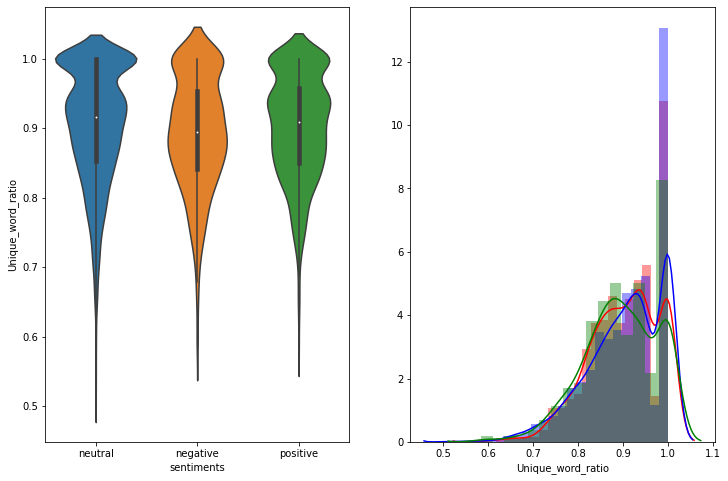

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'sentiments', y = 'Unique_word_ratio', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiments'] == 'positive']['Unique_word_ratio'][0:] , label = "positive", color = 'red')
sns.distplot(df[df['sentiments'] == 'neutral']['Unique_word_ratio'][0:] , label = "neutral" , color = 'blue' )
sns.distplot(df[df['sentiments'] == 'negative']['Unique_word_ratio'][0:] , label = "negative" , color = 'green' )

plt.show()

# Train Test split

In [0]:
df['sentiments']=df['sentiments'].map({'positive':1,'negative':0,'neutral':2})

In [26]:
df.head()

,sentiments,description,des_length,word_count,unique_words,Unique_word_ratio
0,2,according gran company plans move production r...,127,25,19,0.760000
1,2,technopolis plans develop stages area less 100...,190,31,28,0.903226
2,0,international electronic industry company elco...,228,36,31,0.833333
3,1,new production plant company increase capacity...,206,33,24,0.727273
4,1,according company s updated strategy years 200...,203,41,32,0.780488


In [27]:
df.corr()
#we can see Unique word ratio is little correalted 

,sentiments,des_length,word_count,unique_words,Unique_word_ratio
sentiments,1.000000,-0.038140,-0.093165,-0.095071,0.044838
des_length,-0.038140,1.000000,0.958270,0.944283,-0.559290
word_count,-0.093165,0.958270,1.000000,0.972438,-0.614546
unique_words,-0.095071,0.944283,0.972438,1.000000,-0.447367
Unique_word_ratio,0.044838,-0.559290,-0.614546,-0.447367,1.000000


In [28]:
Y=df['sentiments']
Y

0       2
1       2
2       0
3       1
4       1
       ..
4841    0
4842    2
4843    0
4844    0
4845    0
Name: sentiments, Length: 4846, dtype: int64

In [0]:
X=df[['description']]

In [30]:
X

,description
0,according gran company plans move production r...
1,technopolis plans develop stages area less 100...
2,international electronic industry company elco...
3,new production plant company increase capacity...
4,according company s updated strategy years 200...
...,...
4841,london marketwatch share prices ended lower lo...
4842,rinkuskiai s beer sales fell 6 5 per cent 4 16...
4843,operating profit fell eur 35 4 mn eur 68 8 mn ...
4844,net sales paper segment decreased eur 221 6 mn...


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,stratify=Y)
print('X_train shape: ',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape', y_train.shape)
print('y_train shape', y_test.shape)


X_train shape:  (3876, 1)
X_test shape (970, 1)
y_train shape (3876,)
y_train shape (970,)


In [32]:
X_train.head()

,description
1372,desk will reach full planned strength ten pers...
701,current year raute expects net sales increase ...
4173,antti orkola president kemira growhow s indust...
3541,based 2005 calendar year combined company eur1...
2572,stora enso global paper packaging wood product...


# Preprocessing of Text
*  Using TFIDF

In [902]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,2))
vectorizer_tfidf.fit(X_train['description'])
X_train_tfidf = vectorizer_tfidf.transform(X_train['description'].values)
X_test_tfidf= vectorizer_tfidf.transform(X_test['description'].values)
print("Shape of train data matrix after one hot encoding ")
print(X_train_tfidf.shape,y_train.shape)
print(X_test_tfidf.shape,y_train.shape)

Shape of train data matrix after one hot encoding 
(3876, 1185) (3876,)
(970, 1185) (3876,)


In [929]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(ngram_range=(1,2),min_df=10)
X_train_count = count_vec.fit_transform(X_train['description'].values)
X_test_count = count_vec.transform(X_test['description'].values)
X_train_count.shape, X_test_count.shape

((3876, 1185), (970, 1185))

In [679]:
X_train_count

<3876x993 sparse matrix of type '<class 'numpy.int64'>'
	with 32391 stored elements in Compressed Sparse Row format>

* Save in pickle file

In [0]:
import pickle

In [0]:
with open('X_train_tfidf.pickle', 'wb') as f:
  pickle.dump([X_train_tfidf, y_train], f)

with open('X_test_tfidf.pickle', 'wb') as f:
  pickle.dump([X_test_tfidf, y_test], f)

with open('X_train_count.pickle', 'wb') as f:
  pickle.dump([X_train_count, y_train], f)

with open('X_test_count.pickle', 'wb') as f:
  pickle.dump([X_test_count, y_test], f)


## Load train and test data from pickle file

In [0]:
#load train data from train.pickel
import pickle
with open('/content/drive/My Drive/X_train_tfidf.pickle','rb') as f:
  X_train_tfidf, y_train = pickle.load(f)
print(X_train_tfidf.shape, y_train.shape)
print(type(X_train_tfidf))

(3246, 1055) (3246,)
<class 'scipy.sparse.csr.csr_matrix'>


In [0]:
#Load test data from test.pickel
with open('/content/drive/My Drive/X_test_tfidf.pickle','rb') as f:
  X_test_tfidf, y_test = pickle.load(f)
print(X_test_tfidf.shape, y_test.shape)
print(type(X_test_tfidf))

(1600, 1055) (1600,)
<class 'scipy.sparse.csr.csr_matrix'>


# Hyperparameter Tunning GridSearch

### Logistic regression on Count Vectorizer

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [917]:
parameters = {'C': [10**-4, 10**-3, 10**-2, 10**-1, 10**0]}
LG = LogisticRegression(class_weight='balanced')
classif = GridSearchCV(LG, parameters, cv=5,return_train_score=True)
classif.fit(X_train_count,y_train)
#print(LG.score(X_test_tfidf,y_test))
#print(LG.score(X_train_tfidf,y_train))

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [918]:
print('Best params',classif.best_params_)

Best params {'C': 0.1}


In [919]:
print('Best score',classif.best_score_)

Best score 0.7244632524110409


In [920]:
y_pred=classif.predict(X_test_count)
print('Confusion matrix')
confusion_matrix(y_test,y_pred)

Confusion matrix


array([[ 74,  12,  35],
       [ 27, 164,  82],
       [ 36,  91, 449]])

In [921]:
print('Misclassified points =',(y_test != y_pred).sum())

Misclassified points = 283


In [930]:
print('Train Score',classif.score(X_train_count,y_train))
print('Test Score',classif.score(X_test_count,y_test))

Train Score 0.8353973168214655
Test Score 0.7082474226804124


In [931]:
c=classification_report(y_test,y_pred)
print(c)

              precision    recall  f1-score   support

           0       0.54      0.61      0.57       121
           1       0.61      0.60      0.61       273
           2       0.79      0.78      0.79       576

    accuracy                           0.71       970
   macro avg       0.65      0.66      0.66       970
weighted avg       0.71      0.71      0.71       970



## Logistic Regression TFIDF Features

In [924]:
LG=LogisticRegression(C=0.1,class_weight='balanced')
LG.fit(X_train_tfidf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [925]:
LG.score(X_test_tfidf,y_test)

0.6938144329896907

In [926]:
LG.score(X_train_tfidf,y_train)

0.7690918472652218

In [927]:
(y_test != LG.predict(X_test_tfidf)).sum()

297

In [928]:
print(classification_report(y_test,LG.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.50      0.64      0.56       121
           1       0.60      0.48      0.53       273
           2       0.78      0.81      0.79       576

    accuracy                           0.69       970
   macro avg       0.63      0.64      0.63       970
weighted avg       0.69      0.69      0.69       970



## SVM on TFIDF

In [957]:
from sklearn.svm import SVC
# define model
model = SVC(kernel='linear',class_weight='balanced',C=0.2)
# fit model
model.fit(X_train_tfidf, y_train)


SVC(C=0.2, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [958]:
yhat=model.predict(X_test_tfidf)
confusion_matrix(y_test,yhat)

array([[ 75,  12,  34],
       [ 40, 127, 106],
       [ 38,  55, 483]])

In [959]:
print('Misclassified points =',(y_test != yhat).sum())

Misclassified points = 285


In [960]:
print('Train Score',model.score(X_train_tfidf,y_train))
print('Test Score',model.score(X_test_tfidf,y_test))

Train Score 0.7879256965944272
Test Score 0.7061855670103093


In [961]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.49      0.62      0.55       121
           1       0.65      0.47      0.54       273
           2       0.78      0.84      0.81       576

    accuracy                           0.71       970
   macro avg       0.64      0.64      0.63       970
weighted avg       0.71      0.71      0.70       970



## SVM on Count Vectorizer

In [944]:
# define model
model = SVC(kernel='linear',class_weight='balanced',C=0.01)
# fit model
model.fit(X_train_count, y_train)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [946]:
yhat=model.predict(X_test_count)
confusion_matrix(y_test,yhat)

array([[ 58,   7,  56],
       [ 27,  93, 153],
       [ 15,  28, 533]])

In [947]:
print('Misclassified points =',(y_test != yhat).sum())

Misclassified points = 286


In [948]:
print('Train Score',model.score(X_train_count,y_train))
print('Test Score',model.score(X_test_count,y_test))

Train Score 0.7383900928792569
Test Score 0.7051546391752578


In [949]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.58      0.48      0.52       121
           1       0.73      0.34      0.46       273
           2       0.72      0.93      0.81       576

    accuracy                           0.71       970
   macro avg       0.67      0.58      0.60       970
weighted avg       0.70      0.71      0.68       970



# Naive bayes with Hyperparameter Tuning on Count Vectorizer

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [991]:
parameters = {'alpha': [10**-4, 10**-3, 10**-2, 10**-1, 10**0,10**1,10**2]}
clf1=MultinomialNB()
classif1 = GridSearchCV(clf1, parameters, cv=10,return_train_score=True)
#LG.fit(X_train_tfidf,y_train)
classif1.fit(X_train_count,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [992]:
classif1.best_params_

{'alpha': 0.01}

In [993]:
print("Best Score on CV =",classif1.best_score_)

Best Score on CV = 0.7089680066064626


In [994]:
y_hat=classif1.predict(X_test_count)
print('Confusion Matrix')
confusion_matrix(y_test,y_hat)

Confusion Matrix


array([[ 64,  18,  39],
       [ 30, 113, 130],
       [ 30,  47, 499]])

In [995]:
print('Misclassified points =',(y_test != y_hat).sum())

Misclassified points = 294


In [996]:
print('Train Score',classif1.score(X_train_count,y_train))
print('Test Score',classif1.score(X_test_count,y_test))

Train Score 0.7652218782249742
Test Score 0.6969072164948453


In [997]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.52      0.53      0.52       121
           1       0.63      0.41      0.50       273
           2       0.75      0.87      0.80       576

    accuracy                           0.70       970
   macro avg       0.63      0.60      0.61       970
weighted avg       0.69      0.70      0.68       970



# Naive Bayes on TFIDF Vectorizer

In [1008]:
ml=MultinomialNB(alpha=0.1)
ml.fit(X_train_tfidf,y_train)
print('Test Score',ml.score(X_test_tfidf,y_test))
print('Train Score', ml.score(X_train_tfidf,y_train))

Test Score 0.7082474226804124
Train Score 0.7654798761609907


In [1009]:
print('Misclassified points =',(y_test != ml.predict(X_test_tfidf)).sum())

Misclassified points = 283


In [1010]:
print(classification_report(y_test,ml.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.57      0.45      0.50       121
           1       0.69      0.41      0.51       273
           2       0.73      0.91      0.81       576

    accuracy                           0.71       970
   macro avg       0.66      0.59      0.61       970
weighted avg       0.70      0.71      0.69       970



# XGBOOST

In [0]:
from xgboost import XGBClassifier


In [1012]:
from numpy import mean
xg=XGBClassifier()
#kfold = RepeatedStratifiedKFold(n_splits=10,random_state=1)
n_estimators = [50,100,150,200]
max_depth = [2,4,6,8]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators,learning_rate=learning_rate)
grid_search = GridSearchCV(xg, param_grid, scoring="accuracy", n_jobs=-1, cv=3, verbose=1)
grid_result = grid_search.fit(X_train_tfidf, y_train)
# evaluate model
# summarize performance


Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 11.5min finished


In [1014]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.746904 using {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
0.654283 (0.004572) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 50}
0.654283 (0.004572) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 100}
0.654799 (0.005016) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 150}
0.654799 (0.005016) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 200}
0.681115 (0.011498) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 50}
0.681115 (0.011498) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 100}
0.681115 (0.011498) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 150}
0.681115 (0.011498) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 200}
0.700980 (0.006698) with: {'learning_rate': 0.0001, 'max_depth': 6, 'n_estimators': 50}
0.700980 (0.006698) with: {'learning_rate': 0.0001, 'max_depth': 6, 'n_estimators': 100}
0.700980 (0.006698) with: {'lear

## XGBOOST on TFIDF vectorizer With best hyperparameters

In [1037]:
xg=XGBClassifier(learning_rate= 0.1, max_depth= 8, n_estimators=100)
xg.fit(X_train_tfidf,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [1038]:
print('Test Score',xg.score(X_test_tfidf,y_test))
print('Train Score',xg.score(X_train_tfidf,y_train))

Test Score 0.7402061855670103
Train Score 0.8560371517027864


In [1039]:
y_p=xg.predict(X_test_tfidf)
print('Misclassified points',(y_test != y_p).sum())

Misclassified points 252


In [1040]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.79      0.41      0.54       121
           1       0.74      0.46      0.57       273
           2       0.74      0.94      0.83       576

    accuracy                           0.74       970
   macro avg       0.76      0.61      0.65       970
weighted avg       0.74      0.74      0.72       970



## XGBOOST ON Count vectorizer Features



In [1061]:
xgb=XGBClassifier()
xgb.fit(X_train_count,y_train)
print('Test score',xgb.score(X_test_count,y_test))
print('Train score',xgb.score(X_train_count,y_train))

Test score 0.722680412371134
Train score 0.7657378740970072


In [1062]:
y_pr=xg.predict(X_test_count)
print('Misclassified points',(y_test != y_pr).sum())

Misclassified points 310


In [1063]:
print(classification_report(y_test,y_pr))

              precision    recall  f1-score   support

           0       0.62      0.17      0.27       121
           1       0.82      0.26      0.40       273
           2       0.67      0.98      0.80       576

    accuracy                           0.68       970
   macro avg       0.70      0.47      0.49       970
weighted avg       0.70      0.68      0.62       970

